# Task - 3

## Decision Tree Algorithm

### Author : Sandeep Pasumarthi

### Project: Create Decision tree classifier for iris data set.

### Project Description: Using decision tree classifier, predict the specie of the flower for given set of features and visualize the classification of decision tree

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Data Set

data = pd.read_csv('Iris.csv')
data.shape

(150, 6)

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Total Description of Data

data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,150,NaN,NaN,NaN,75.5,43.4454,1,38.25,75.5,112.75,150
SepalLengthCm,150,NaN,NaN,NaN,5.84333,0.828066,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,150,NaN,NaN,NaN,3.054,0.433594,2,2.8,3,3.3,4.4
PetalLengthCm,150,NaN,NaN,NaN,3.75867,1.76442,1,1.6,4.35,5.1,6.9
PetalWidthCm,150,NaN,NaN,NaN,1.19867,0.763161,0.1,0.3,1.3,1.8,2.5
Species,150,3,Iris-versicolor,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
data = data.drop('Id', axis = 1)

In [7]:
data['Species'] = data['Species'].map({'Iris-versicolor' : 0,
                                      'Iris-setosa' : 1,
                                      'Iris-virginica' : 2})

In [8]:
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

### Features, target and train_test_split

In [10]:
features = data.drop('Species', axis = 1).columns
target = ['Species']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(data[features], data[target], test_size = 0.3, stratify = data[target], 
                                                    random_state = 17)

### Optimum max_depth to avoid over fitting

In [12]:
max_depth = []
accuracy = []

for i in range(1, 10):
    dtree = DecisionTreeClassifier(max_depth = i, random_state = 17)
    dtree.fit(x_train, y_train)
    max_depth.append(i)
    accuracy.append(accuracy_score(y_test, dtree.predict(x_test)))

In [13]:
accuracy

[0.6666666666666666,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556]

From the array above, from index 1 accuracy reached maximum. So, optimum max_depth is at index 1.

In [14]:
max_depth[1]

2

In [15]:
dtree = DecisionTreeClassifier(max_depth = 2, random_state = 17)
dtree.fit(data[features].values, data[target].values)

DecisionTreeClassifier(max_depth=2, random_state=17)

## Visualizing the Classification of Desicion Tree Model

[Text(267.84000000000003, 362.4, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(133.92000000000002, 217.44, 'gini = 0.0\nsamples = 50\nvalue = [0, 50, 0]'),
 Text(401.76000000000005, 217.44, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [50, 0, 50]'),
 Text(267.84000000000003, 72.47999999999996, 'gini = 0.168\nsamples = 54\nvalue = [49, 0, 5]'),
 Text(535.6800000000001, 72.47999999999996, 'gini = 0.043\nsamples = 46\nvalue = [1, 0, 45]')]

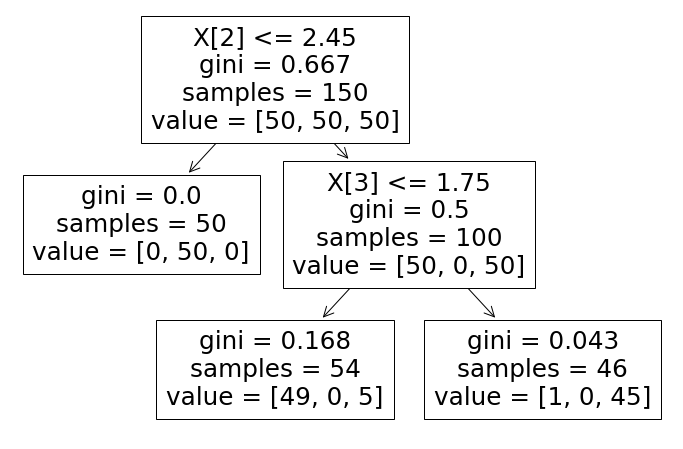

In [16]:
plt.figure(figsize = (12, 8))
tree.plot_tree(dtree)

It seems our model is predictions are good.

### Model's Performance

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test,  dtree.predict(x_test)))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       1.00      1.00      1.00        15
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



# Thank You